In [451]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder

#sklearn models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

#dark background for visibility in VS jupyter environment
from matplotlib import style
style.use('seaborn-dark-palette')



# import librosa
# import librosa.display
# import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')


#load tensor flow libraries for Neural Networks
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#pretty confusion matrices 
from sklearn.metrics import confusion_matrix
from daze import plot_confusion_matrix



In [366]:
#read data
sound_df = pd.read_csv("/Users/johndinh/sta221-deeplearning/Project/Music Classification /Data/features_3_sec.csv")

In [367]:
sound_df.drop(labels =['filename'], axis = 1, inplace = True) #drop the filename column

In [368]:
sound_df.columns[0:58] #X variable column names

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='

Text(0.5, 1.0, 'Tempo by Genre')

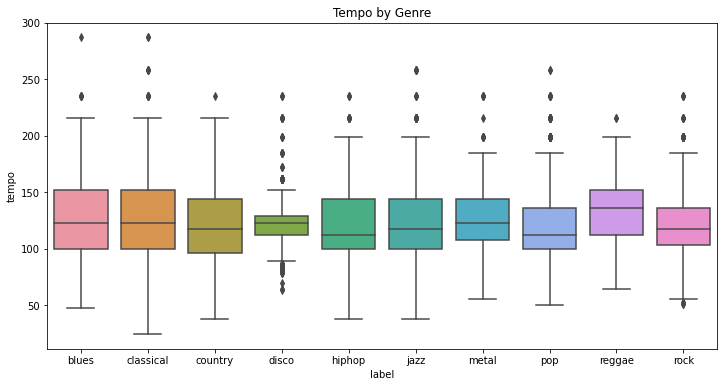

In [369]:
#box plot of tempo by genre
plt.figure(figsize = (12,6))
sns.boxplot(x = "label", y = "tempo", data = sound_df)
plt.title("Tempo by Genre")

In [370]:
#standardize the data for modeling

#first, designate target/label 
target = sound_df[['label']] #genre: blues, classical, country, etc


#drop the target variable from the dataset for standardizing
sound_standardized = MinMaxScaler().fit_transform(sound_df.drop(labels = ['label'],axis = 1))

#make it a dataframe
sound_df_standardized = pd.DataFrame(sound_standardized, columns = sound_df.columns[0:58] )

In [371]:
sound_df_standardized #looks good 

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0        0.0          0.355399         0.716757  0.293133  0.107955   
1        0.0          0.367322         0.670347  0.253040  0.044447   
2        0.0          0.373159         0.728067  0.296753  0.141663   
3        0.0          0.399349         0.677066  0.298024  0.075042   
4        0.0          0.355668         0.689113  0.322308  0.052149   
...      ...               ...              ...       ...       ...   
9985     0.0          0.376757         0.617031  0.111106  0.002984   
9986     0.0          0.413243         0.637013  0.128944  0.002687   
9987     0.0          0.374196         0.697548  0.116503  0.021500   
9988     0.0          0.436537         0.657745  0.148266  0.009825   
9989     0.0          0.408151         0.676143  0.112249  0.002048   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                   0.262173               0.034784                 0.459205   
1                   0.270969               0.018716                 0.470831   
2                   0.265293               0.023073                 0.494051   
3                   0.238427               0.023187                 0.455246   
4                   0.233460               0.016451                 0.451651   
...                      ...                    ...                      ...   
9985                0.206932               0.034101                 0.380041   
9986                0.277274               0.058465                 0.438552   
9987                0.176099               0.138139                 0.331163   
9988                0.324968               0.042367                 0.473422   
9989                0.234201               0.085665                 0.426384   

      spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
0                   0.094130      0.346153  ...     0.363613    0.056198   
1                   0.052261      0.363722  ...     0.468596    0.092912   
2                   0.059922      0.378215  ...     0.479681    0.096704   
3                   0.066234      0.329587  ...     0.386258    0.067995   
4                   0.047830      0.318453  ...     0.438567    0.042500   
...                      ...           ...  ...          ...         ...   
9985                0.068680      0.266983  ...     0.494342    0.060299   
9986                0.079860      0.349793  ...     0.438282    0.045545   
9987                0.111494      0.202062  ...     0.391617    0.112660   
9988                0.017567      0.413964  ...     0.469334    0.039551   
9989                0.096064      0.317552  ...     0.427192    0.054901   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0        0.397172    0.066062     0.371828    0.055344     0.380831   
1        0.351681    0.074001     0.362068    0.076365     0.418452   
2        0.420979    0.050639     0.400536    0.067509     0.433742   
3        0.387474    0.050617     0.380430    0.050030     0.405824   
4        0.460314    0.083860     0.388590    0.076524     0.409019   
...           ...         ...          ...         ...          ...   
9985     0.302553    0.069546     0.285713    0.044089     0.371046   
9986     0.249505    0.122777     0.305915    0.081395     0.263338   
9987     0.408760    0.038190     0.442668    0.035995     0.496892   
9988     0.362864    0.029532     0.471308    0.028749     0.506738   
9989     0.262072    0.108687     0.356219    0.083545     0.349326   

      mfcc19_var  mfcc20_mean  mfcc20_var  
0       0.026797     0.506746    0.047781  
1       0.082414     0.593029    0.065548  
2       0.043841     0.546264    0.036062  
3       0.041898     0.562204    0.034873  
4       0.020763     0.517913    0.031713  
...          ...          ...         ...  
9985    0.040116     0.536263    0.042502  
9986    0.052963     0.516365    0.020232  
9987    0.039921     0.505937 

In [372]:
#numerically encode labels(genres)
le = LabelEncoder()
target_df = target[['label']].copy() #Create an extra dataframe which will be used to address only the encoded values
target_df['numerical_label'] = le.fit_transform(target['label'].values) #Using values is faster than using list

In [373]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sound_df_standardized, target_df['numerical_label'], test_size= .3, random_state=69)

In [427]:
# make a function for easier evaluation of each model
def model_eval(model, title = ""):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print('Accuracy', title, ':', round(accuracy_score(y_test, predictions), 4), '\n')

In [428]:
target_df

label  numerical_label
0     blues                0
1     blues                0
2     blues                0
3     blues                0
4     blues                0
...     ...              ...
9985   rock                9
9986   rock                9
9987   rock                9
9988   rock                9
9989   rock                9

[9990 rows x 2 columns]

In [376]:
# Naive Bayes
nb = GaussianNB()
model_eval(nb, "Naive Bayes")



Accuracy Naive Bayes : 0.51 



In [377]:
# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_eval(sgd, "Stochastic Gradient Descent")

Accuracy Stochastic Gradient Descent : 0.653 



In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,75))
n_neighbors = list(range(1,50))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_tuned = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_tuned, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print(best_model.best_params_)

In [429]:
# KNN
knn_tuned =  KNeighborsClassifier(n_neighbors = 6, leaf_size= 1, p = 1)
model_eval(knn_tuned, "Tuned KNN")

Accuracy Tuned KNN : 0.9002 



In [384]:
# Number of trees in random forest
criterion = ['gini', 'entropy', 'log_loss']
# Number of features to consider at every split
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 1000)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 100, num = 1000)]
min_samples_split.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2, 100, num = 1000)]
min_samples_leaf.append(None)
#max features param
max_features = ['sqrt']
# Create the random grid
random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features
               }

dt = DecisionTreeClassifier()

dt_random = RandomizedSearchCV(estimator = dt, param_distributions= random_grid, n_iter= 500, cv = 50, 
verbose = 2, random_state = 42, n_jobs = -1)

dt_random.fit(X_train, y_train)

Fitting 50 folds for each of 500 candidates, totalling 25000 fits
[CV] END criterion=entropy, max_depth=80, max_features=sqrt, min_samples_leaf=16, min_samples_split=19, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=80, max_features=sqrt, min_samples_leaf=16, min_samples_split=19, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=80, max_features=sqrt, min_samples_leaf=16, min_samples_split=19, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=80, max_features=sqrt, min_samples_leaf=16, min_samples_split=19, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=80, max_features=sqrt, min_samples_leaf=16, min_samples_split=19, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=80, max_features=sqrt, min_samples_leaf=16, min_samples_split=19, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=80, max_features=sqrt, min_samples_leaf=16, min_samples_

RandomizedSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 10, 10, 10, 10, 10,
                                                      10, 10, 10, 10, 11, 11,
                                                      11, 11, 11, 11, 11, 11,
                                                      11, 11, 12, 12, 12, 12,
                                                      12, 12, 12, 12, 12, 12, ...],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 2, 2, 2, 2, 2,
                                                             2, 2, 2, 2, 2, 3,
                                                             3, 3, 3, 3, 3, 3,
                                                             3, 3, 3, 4, 4, 4,
                                                             4, 4, 4, 4, 4, 4, ...],
                                        'min_samples_split': [2, 2, 2, 2, 2, 2,
                                                              2, 2, 2, 2, 2, 3,
                                                              3, 3, 3, 3, 3, 3,
                                                              3, 3, 3, 4, 4, 4,
                                                              4, 4, 4, 4, 4, 4, ...],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [430]:
print(dt_random.best_params_)

#fitting model with CV parameters 
dt_tuned = DecisionTreeClassifier(splitter= 'best', min_samples_split= 4, 
min_samples_leaf= 2, 
max_depth= 26, 
criterion= 'entropy',
max_features= 'sqrt', 
random_state = 42)

#lmao
model_eval(dt_tuned, 'Tuned Decision Trees')

{'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 26, 'criterion': 'entropy'}
Accuracy Tuned Decision Trees : 0.5742 



In [431]:
# Decision trees is better with default parameters what the fuck
tree = DecisionTreeClassifier()
model_eval(tree, "Decission trees")

Accuracy Decission trees : 0.65 



In [388]:
#tuning random forest (takes 25 mins)
# Number of trees in random forest
n_estimators = [int(x) for x in range(1000,2000,10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, n_iter= 100, cv = 3, 
verbose = 2, random_state = 42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=  26.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=  26.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=  27.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1900; total time=  34.8s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1900; total time=  35.1s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1900; total time=  34.6s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimat

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1000, 1010, 1020, 1030,
                                                         1040, 1050, 1060, 1070,
                                                         1080, 1090, 1100, 1110,
                                                         1120, 1130, 1140, 1150,
                                                         1160, 1170, 1180, 1190,
                                                         1200, 1210, 1220, 1230,
                                                         1240, 1250, 1260, 1270,
                                                         1280, 1290, ...]},
                   random_state=42, verbose=2)

In [390]:
rf_random.best_params_

{'n_estimators': 1420,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [432]:
#specifying rf with tuned parameters 
params = {
 'n_estimators': 1420,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False,
 'random_state': 42
 }
rf = RandomForestClassifier(**params)

model_eval(rf, 'Tuned Random Forest')

rf_pred = rf.predict(X_test)

Accuracy Tuned Random Forest : 0.8942 



In [395]:
#tuning SVM using grid search
param_grid = {
'C': [.01, .5, 1], 
'gamma': [1,0.1 ,0.01],
'kernel': ['rbf']
}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END .....................C=0.01, gamma=0.01,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.5, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [434]:
#tuned svm
svm = SVC(
    C = 4.040404040404041,
 gamma = 1, 
 kernel = 'rbf', 
 decision_function_shape="ovo",
  random_state= 42)
model_eval(svm, "Support Vector Machine")

Accuracy Support Vector Machine : 0.8849 



In [401]:
# Logistic Regression
param_grid = {
'C': np.linspace(5, 10, 10), 
'l1_ratio': np.linspace(.1, .999 , 3),
'penalty': ['elasticnet'],
'solver' : ['saga'],
'multi_class' : ['multinomial'],
'random_state' : [42],


}
lr = LogisticRegression()
grid = GridSearchCV(lr ,param_grid, refit=True, verbose=2)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END C=5.0, l1_ratio=0.1, multi_class=multinomial, penalty=elasticnet, random_state=42, solver=saga; total time=   1.3s
[CV] END C=5.0, l1_ratio=0.1, multi_class=multinomial, penalty=elasticnet, random_state=42, solver=saga; total time=   1.3s
[CV] END C=5.0, l1_ratio=0.1, multi_class=multinomial, penalty=elasticnet, random_state=42, solver=saga; total time=   1.2s
[CV] END C=5.0, l1_ratio=0.1, multi_class=multinomial, penalty=elasticnet, random_state=42, solver=saga; total time=   1.3s
[CV] END C=5.0, l1_ratio=0.1, multi_class=multinomial, penalty=elasticnet, random_state=42, solver=saga; total time=   1.2s
[CV] END C=5.0, l1_ratio=0.5495, multi_class=multinomial, penalty=elasticnet, random_state=42, solver=saga; total time=   1.3s
[CV] END C=5.0, l1_ratio=0.5495, multi_class=multinomial, penalty=elasticnet, random_state=42, solver=saga; total time=   1.3s
[CV] END C=5.0, l1_ratio=0.5495, multi_class=multinomial, penalt

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([ 5.        ,  5.55555556,  6.11111111,  6.66666667,  7.22222222,
        7.77777778,  8.33333333,  8.88888889,  9.44444444, 10.        ]),
                         'l1_ratio': array([0.1   , 0.5495, 0.999 ]),
                         'multi_class': ['multinomial'],
                         'penalty': ['elasticnet'], 'random_state': [42],
                         'solver': ['saga']},
             verbose=2)

In [435]:
#best parameters from Grid Search for LR
print(grid.best_params_)

params = {'C': 10, 
'l1_ratio': 0.999, 
'multi_class': 'multinomial', 
'penalty': 'elasticnet',
'random_state': 42, 
'solver': 'saga'}

lr_tuned = LogisticRegression(**params)

model_eval(lr_tuned, "Tuned Logistic Regression")

{'C': 10.0, 'l1_ratio': 0.999, 'multi_class': 'multinomial', 'penalty': 'elasticnet', 'random_state': 42, 'solver': 'saga'}
Accuracy Tuned Logistic Regression : 0.7171 



In [404]:
# MLP
nn = MLPClassifier(solver='lbfgs', alpha= 1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_eval(nn, "Multi-Layer Perceptron")

Accuracy Multi-Layer Perceptron : 0.699 



In [266]:
#tuning MLP
#dont run, takes very long time 
mlp = MLPClassifier(max_iter= 100000)

parameter_space = {
    'hidden_layer_sizes': [(500, 10), (5000, 10)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.1, .5,  0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_gs = GridSearchCV(mlp, param_grid= parameter_space, n_jobs=-1, cv = 3, random_state = 1)

mlp_gs.fit(X_train, y_train)
print(mlp_gs.best_params_)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.1, 0.5, 0.05],
                         'hidden_layer_sizes': [(500, 10), (5000, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']})

In [436]:
#multilayer perceptron tuned
params = {
    'activation': 'relu', 
    'alpha': 0.005, 
    'hidden_layer_sizes': (500, 10), 
    'learning_rate': 'constant', 
    'solver': 'adam', 
    'random_state' : 1}
nn_tuned = MLPClassifier(**params)
model_eval(nn_tuned, "Tuned Multi-layer Perceptron")
nn_tuned_pred = nn_tuned.predict(X_test)

Accuracy Tuned Multi-layer Perceptron : 0.8182 



In [437]:
# Cross Gradient Booster: No Tuning
params = {
            #'objective':'binary:logistic',
            #'max_depth': 4,
            #'alpha': 10,
            #'learning_rate': 0.05,
            'n_estimators':1000
        }         
xgb = XGBClassifier(**params)
xgb_fit = xgb.fit(X_train, y_train, eval_metric = 'mlogloss')

#generate predictions 
xgb_preds = xgb_fit.predict(X_test)
print('Accuracy', "XGBoost", ':', round(accuracy_score(y_test, xgb_preds), 3), '\n')


Accuracy XGBoost : 0.905 



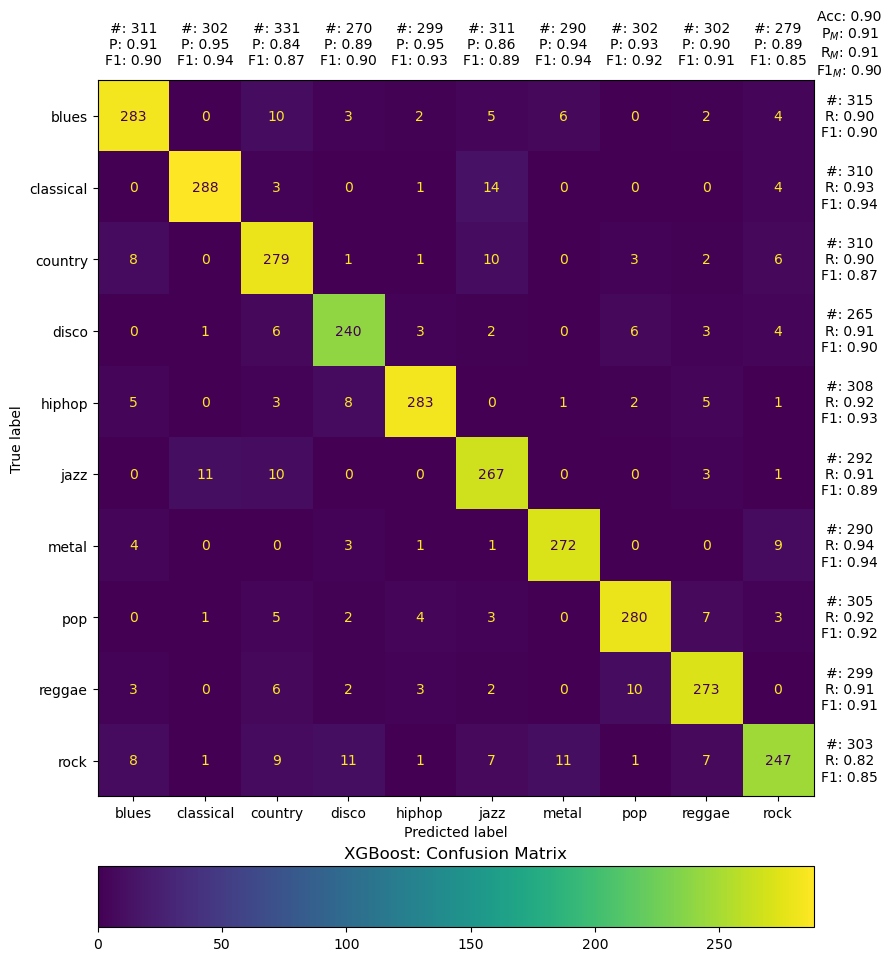

In [465]:
#plotting confusion matrix for xgboost 
style.use('default')

classes = ('blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock')
fig, ax = plt.subplots(figsize=(11, 11))
cm = confusion_matrix(y_test, xgb_preds)
plot_confusion_matrix(cm, measures=('a', 'c', 'p', 'r', 'f1'), display_labels=classes, measures_format='.2f', ax=ax)
plt.title('XGBoost: Confusion Matrix')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

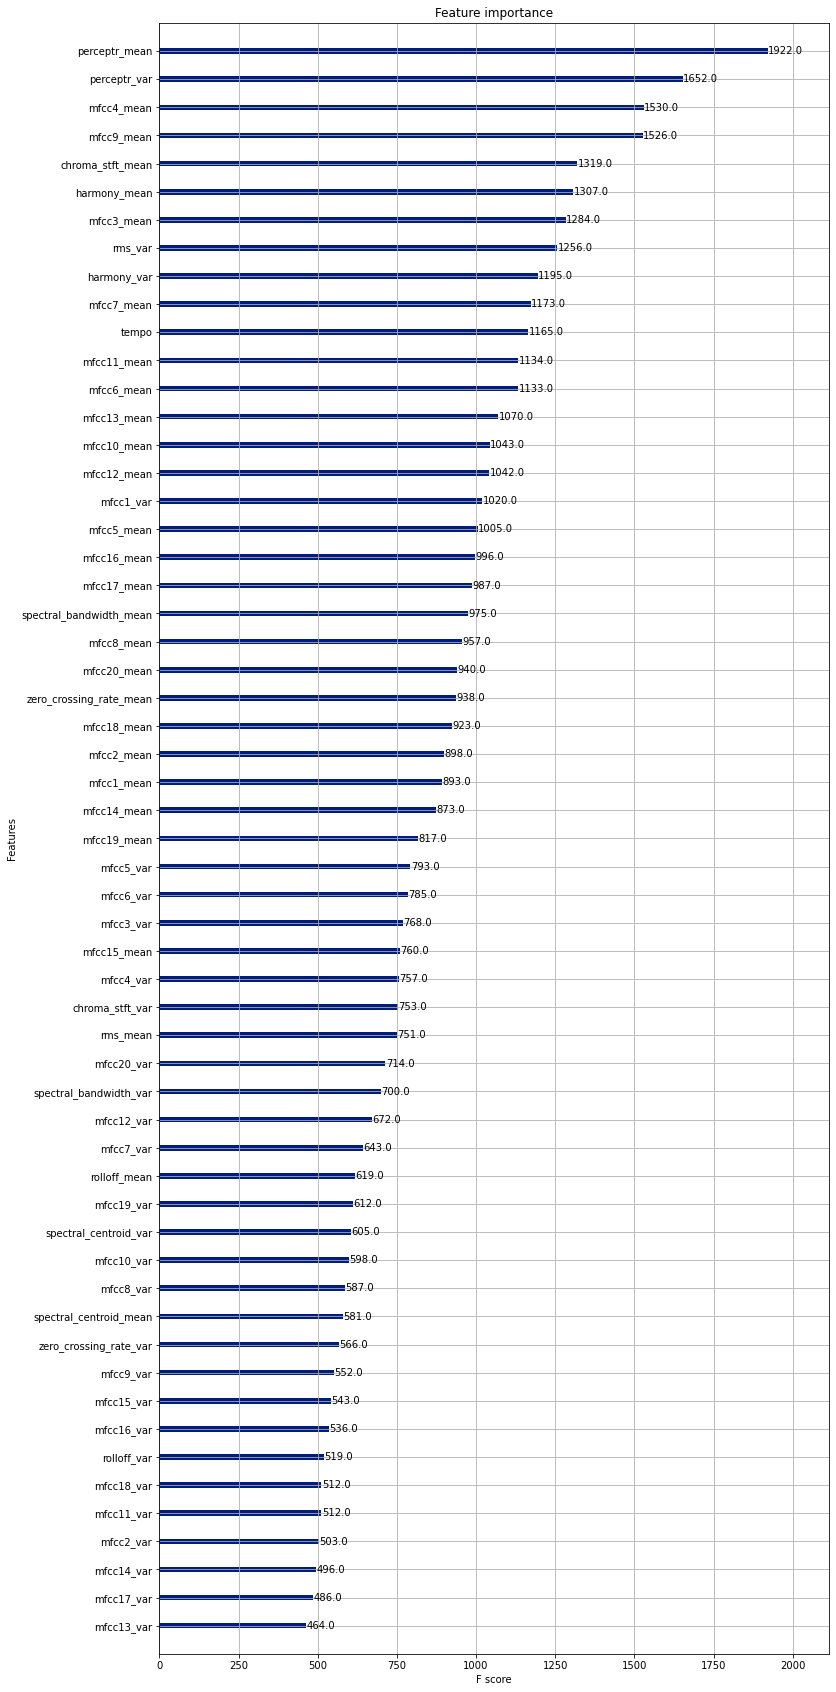

In [426]:
#function alternative to plotting plot_importance fromx xgb 
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

#plotting feature importance, alternative to variable selection 
my_plot_importance(xgb, (12, 30))


In [357]:
#Don't run: tuning is probably not necessary for xgboost datasciencing

#parameter tuning 
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

#space for xgboost parameter tuning
space={'learning_rate':hp.uniform('learning_rate', .1, .45), 
        'max_depth': hp.quniform("max_depth", 1, 15, 1),
        #'gamma': hp.uniform ('gamma', 1 , 10),
        'reg_alpha' : 1,
        #'reg_lambda' : hp.uniform('reg_lambda', 0 , 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        #'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 1000,
        'seed': 0
    }

#XGB Tuning Pipeline 
def objective(space):
    clf=XGBClassifier(
            learning_rate = space['learning_rate'], 
            n_estimators = 1000, 
            max_depth = int(space['max_depth']),
            #gamma = space['gamma'],
            reg_alpha = 1,
            #reg_lambda = space['reg_lambda'],
            #min_child_weight=int(space['min_child_weight']),
            colsample_bytree=int(space['colsample_bytree']),
            seed = 0
            )
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric= "auc",
            early_stopping_rounds = 10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

#Evaluating Pipeline
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [275]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9803778227690019, 'learning_rate': 0.3478479920724665, 'max_depth': 8.0, 'min_child_weight': 3.0, 'reg_lambda': 0.7347036541445152}


In [283]:
#Don't run, based on previous cell
# Cross Gradient Booster: Tuned
#cv split
evaluation = [( X_train, y_train), ( X_test, y_test)]

#parameters from search
params = {
            'colsample_bytree': 0.9803778227690019, 
            'learning_rate': 0.3478479920724665, 
            'max_depth': int(8), 
            'min_child_weight': 3.0, 
            'reg_lambda': 0.7347036541445152,
            'learning_rate': 0.05,
            'n_estimators':1000,
            'seed': 0,
            'reg_alpha' : 1,
            }   

    
xgb = XGBClassifier(**params)
xgb_fit = xgb.fit(X_train, y_train, eval_set = evaluation, early_stopping_rounds= 10, eval_metric = 'auc')

#generate predictions 
xgb_preds = xgb_fit.predict(X_test)
print('Accuracy', "XGBoost", ':', round(accuracy_score(y_test, xgb_preds), 5), '\n')


[0]	validation_0-auc:0.97159	validation_1-auc:0.87884
[1]	validation_0-auc:0.98015	validation_1-auc:0.89395
[2]	validation_0-auc:0.98441	validation_1-auc:0.89622
[3]	validation_0-auc:0.98539	validation_1-auc:0.89822
[4]	validation_0-auc:0.98828	validation_1-auc:0.90419
[5]	validation_0-auc:0.99075	validation_1-auc:0.90985
[6]	validation_0-auc:0.99177	validation_1-auc:0.91495
[7]	validation_0-auc:0.99268	validation_1-auc:0.91681
[8]	validation_0-auc:0.99347	validation_1-auc:0.92035
[9]	validation_0-auc:0.99454	validation_1-auc:0.92356
[10]	validation_0-auc:0.99513	validation_1-auc:0.92542
[11]	validation_0-auc:0.99554	validation_1-auc:0.92798
[12]	validation_0-auc:0.99587	validation_1-auc:0.92938
[13]	validation_0-auc:0.99634	validation_1-auc:0.93097
[14]	validation_0-auc:0.99669	validation_1-auc:0.93179
[15]	validation_0-auc:0.99695	validation_1-auc:0.93197
[16]	validation_0-auc:0.99731	validation_1-auc:0.93359
[17]	validation_0-auc:0.99746	validation_1-auc:0.93417
[18]	validation_0-au

In [421]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size)
                

58

In [422]:
np.random.seed(42)
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    
    Dense(512, activation='relu'),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax'),
])


print(model.summary())

model_history = trainModel(model=model, epochs=500, optimizer='adam')

    

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 1024)              60416     
                                                                 
 dropout_94 (Dropout)        (None, 1024)              0         
                                                                 
 dense_115 (Dense)           (None, 512)               524800    
                                                                 
 dropout_95 (Dropout)        (None, 512)               0         
                                                                 
 dense_116 (Dense)           (None, 256)               131328    
                                                                 
 dropout_96 (Dropout)        (None, 256)               0         
                                                                 
 dense_117 (Dense)           (None, 128)             

2022-05-28 16:01:06.027243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - 1s 18ms/step - loss: 2.1643 - accuracy: 0.1952 - val_loss: 1.7785 - val_accuracy: 0.3110


2022-05-28 16:01:07.063667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/500
55/55 [==============================] - 1s 11ms/step - loss: 1.7782 - accuracy: 0.3175 - val_loss: 1.5908 - val_accuracy: 0.3774
Epoch 3/500
55/55 [==============================] - 1s 10ms/step - loss: 1.5677 - accuracy: 0.4130 - val_loss: 1.4207 - val_accuracy: 0.4508
Epoch 4/500
55/55 [==============================] - 1s 11ms/step - loss: 1.4019 - accuracy: 0.4813 - val_loss: 1.2095 - val_accuracy: 0.5415
Epoch 5/500
55/55 [==============================] - 1s 10ms/step - loss: 1.3093 - accuracy: 0.5220 - val_loss: 1.1524 - val_accuracy: 0.5772
Epoch 6/500
55/55 [==============================] - 1s 10ms/step - loss: 1.2188 - accuracy: 0.5643 - val_loss: 1.0517 - val_accuracy: 0.6059
Epoch 7/500
55/55 [==============================] - 1s 10ms/step - loss: 1.1410 - accuracy: 0.5930 - val_loss: 1.0170 - val_accuracy: 0.6260
Epoch 8/500
55/55 [==============================] - 1s 10ms/step - loss: 1.0683 - accuracy: 0.6259 - val_loss: 0.9802 - val_accuracy: 0.6373
Epoch 

In [459]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 )
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :", test_accuracy*100)

24/24 [==============================] - 0s 6ms/step - loss: 0.5026 - accuracy: 0.9042
The test loss is : 0.5026126503944397

The test Accuracy is : 90.42375683784485


In [460]:
predict_x = model.predict(X_test)
seq_pred_classes = np.argmax(predict_x, axis = 1)

2022-05-28 20:57:08.037439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


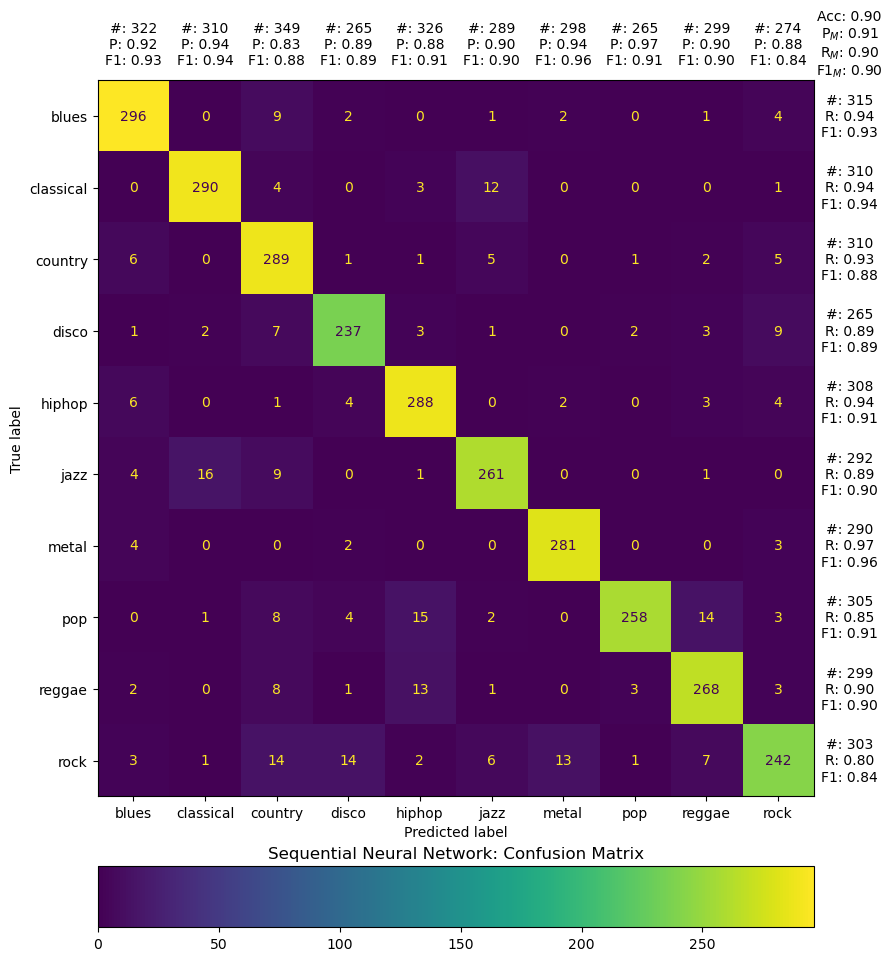

In [464]:
#plotting confusion matrix for xgboost 
style.use('default')

classes = ('blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock')
fig, ax = plt.subplots(figsize=(11, 11))
cm = confusion_matrix(y_test, seq_pred_classes)
plot_confusion_matrix(cm, measures=('a', 'c', 'p', 'r', 'f1'), display_labels=classes, measures_format='.2f', ax=ax)
plt.title('Sequential Neural Network: Confusion Matrix')
plt.show()

In [443]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.title("Loss & Accuracy: Train and Validation")
    #plt.figure(figsize= (10, 19))
    plt.show()
    

Validation Accuracy 0.921254575252533


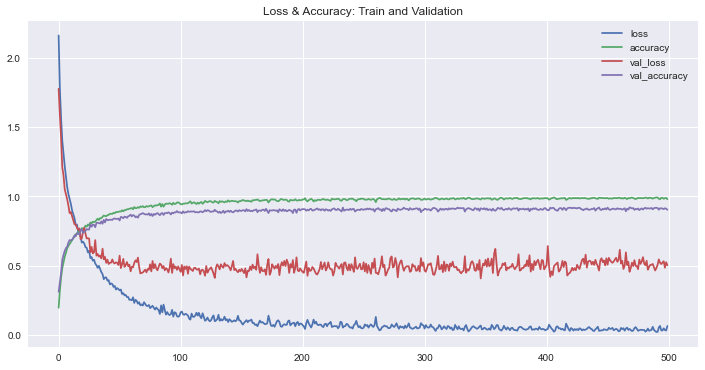

<Figure size 720x1368 with 0 Axes>

In [447]:
from matplotlib import style
style.use('seaborn')
plotValidate(model_history)

In [221]:
# Convert target classes to categorical ones
num_classes = len(np.unique(y_train)) #10 genres
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)



In [36]:

###Ignore
# Set the input shape
# input_shape = (X_train.shape[1],)
# print(f'Feature shape: {input_shape}')

# # Create the model
# model = Sequential()
# model.add(Dense(1000, input_shape=input_shape, activation='relu'))
# # model.add(Dense(50, activation='relu'))
# model.add(Dense(num_classes, activation='softmax')) #softmax for multiclass probabilities

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/10
3/3 [==============================] - 0s 47ms/step - loss: 2.2971 - accuracy: 0.1071 - val_loss: 2.2505 - val_accuracy: 0.3214
Epoch 2/10
3/3 [==============================] - 0s 10ms/step - loss: 2.2553 - accuracy: 0.1750 - val_loss: 2.1989 - val_accuracy: 0.3214
Epoch 3/10
3/3 [==============================] - 0s 9ms/step - loss: 2.2127 - accuracy: 0.2250 - val_loss: 2.1266 - val_accuracy: 0.3429
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 2.1477 - accuracy: 0.2393 - val_loss: 2.0425 - val_accuracy: 0.4071
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 2.0840 - accuracy: 0.2893 - val_loss: 1.9571 - val_accuracy: 0.4214
Epoch 6/10
3/3 [==============================] - 0s 9ms/step - loss: 2.0314 - accuracy: 0.2821 - val_loss: 1.8708 - val_accuracy: 0.4071
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 1.9496 - accuracy: 0.3196 - val_loss: 1.7828 - val_accuracy: 0.4786
Epoch 8/10
3/3 [==============